In [1]:
import tensorflow_hub as hub
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [18]:
embed = hub.load("https://tfhub.dev/google/universal-sentence-encoder/4")


In [3]:
embeddings = embed([
    "The quick brown fox jumps over the lazy dog.",
    "I want to get an embedding",
    "I want to find an embedding"
])
print(type(embeddings))
print(embeddings.numpy()[1].shape)


<class 'tensorflow.python.framework.ops.EagerTensor'>
(512,)


In [4]:
# From https://colab.research.google.com/github/tensorflow/hub/blob/master/examples/colab/semantic_similarity_with_tf_hub_universal_encoder.ipynb#scrollTo=h1FFCTKm7ba4

def plot_similarity(labels, features, rotation):
  corr = np.inner(features, features)
  sns.set(font_scale=1.2)
  g = sns.heatmap(
      corr,
      xticklabels=labels,
      yticklabels=labels,
      vmin=0,
      vmax=1,
      cmap="YlOrRd")
  g.set_xticklabels(labels, rotation=rotation)
  g.set_title("Semantic Textual Similarity")

def run_and_plot(messages_):
  message_embeddings_ = embed(messages_)
  plot_similarity(messages_, message_embeddings_, 90)

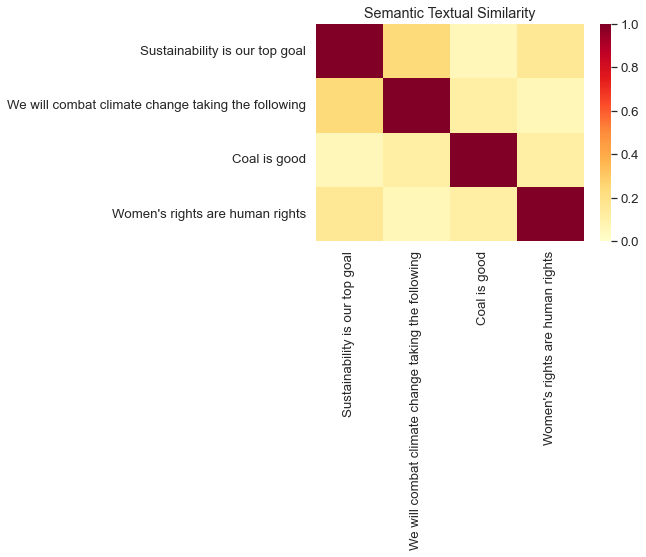

In [5]:
run_and_plot([
    "Sustainability is our top goal",
    "We will combat climate change taking the following",
    "Coal is good",
    "Women's rights are human rights"
])

In [2]:
from nlptools.correlation import KeywordCorrelateSpacy

In [3]:
import json
from nlptools import importer

In [8]:
# Todo
# Filter out root words from correlation list
# Figure out what correlation number means
# Find a minimum correlation mumber such that meaning is still contained


In [4]:
import spacy
from nlptools import importer
from spacy.tokens import Token
from spacy.language import Language
nlp = spacy.load("en_core_web_sm")

In [8]:
exampledoc = importer.TextImporter("../texts/AnnualReport2017-2018.txt")

# @Language.factory("kwd_correlate_factory", default_config={"path": "../ndc_keywords/ndc_south_africa.json", "subject": "climate change"})
# def kwd_correlator(nlp, name, path, subject):
#     with open(path) as f:
#         keywds = json.load(f)
#     return KeywordCorrelateSpacy(embed, keywds[subject])

In [5]:
with open("../ndc_keywords/ndc_south_africa.json") as f:
    kwds = json.load(f)

print(kwds['climate change'])
nlp.add_pipe("kwd_correlate_factory", config={"tf_model": "https://tfhub.dev/google/universal-sentence-encoder/4", "keywords": kwds['climate change'], "correlation_tag": "kwd_correlate"})

['adaption program', 'adaption projects', 'resilience', 'institutional capacity', 'response', 'budget reprioritisation', 'development', 'planner', 'regulator practitioners', 'geographical circumstances', 'land use scheme', 'authorisation system', 'spatial land use management act', 'spluma']


In [10]:
doc = nlp(exampledoc.text)

In [11]:
for i, t in enumerate(doc):
    if i < 10:
        print(f"{str(t)}: {t._.kwd_correlate}")

1: 0.31260553002357483

: 0.3690837621688843
PARLIAMENT: 0.3523975610733032
OF: 0.37870728969573975
THE: 0.3809988498687744
REPUBLIC: 0.28785109519958496
OF: 0.37870728969573975
SOUTH: 0.38434985280036926
AFRICA: 0.31267285346984863
ANNUAL: 0.37393060326576233
